# Medical Chatbot using NLP

*Developed by Shrouq Ahmad Aldalbahi*

---

## Table of Contents
- [Problem Statement](#problem-statement)
- [Dataset](#dataset)
- [Preprocessing](#preprocessing)
- [Text Representation](#text-representation)
- [Conclusion](#conclusion)
- [References](#references)

---

## Problem Statement
The goal of this project is to develop an NLP-based chatbot capable of accurately answering a wide range of medical inquiries.  
- **Motivation**: Improve healthcare accessibility and bridge gaps in medical knowledge.  
- **Expected Result**: Provide accurate, reliable, and understandable medical information in response to user queries.  

---

## Dataset
- Dataset: The dataset chosen for this project is a medical question-answer dataset (medquad.csv) https://www.kaggle.com
- Reason for Choice: This dataset is selected due to its relevance to the medical field and its potential for building a chatbot that can accurately answer medical inquiries. The dataset contains real questions and answers, making it ideal for training an NLP model in the context of medical consultations.


# Import Required Libraries

In [1]:
# Core
import random
import string
import numpy as np
import pandas as pd

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Vectorization & Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
medquad_data =pd.read_csv(r"C:\Users\shrog ahmad\Desktop\mastr's M\NLP\IT9002_Shrouq_202306742\medquad.csv")

## Data Understanding

In [ ]:
medquad_data.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


- Data Snapshot: The dataset contains columns for questions, answers, source, and focus area, offering a comprehensive view of various medical inquiries and their corresponding responses.

In [ ]:
display(medquad_data.shape)

(16412, 4)

- Shape of the Dataset: The dataset contains 16,412 entries, each with four attributes. This substantial size indicates a rich and diverse set of data points for training the NLP model.

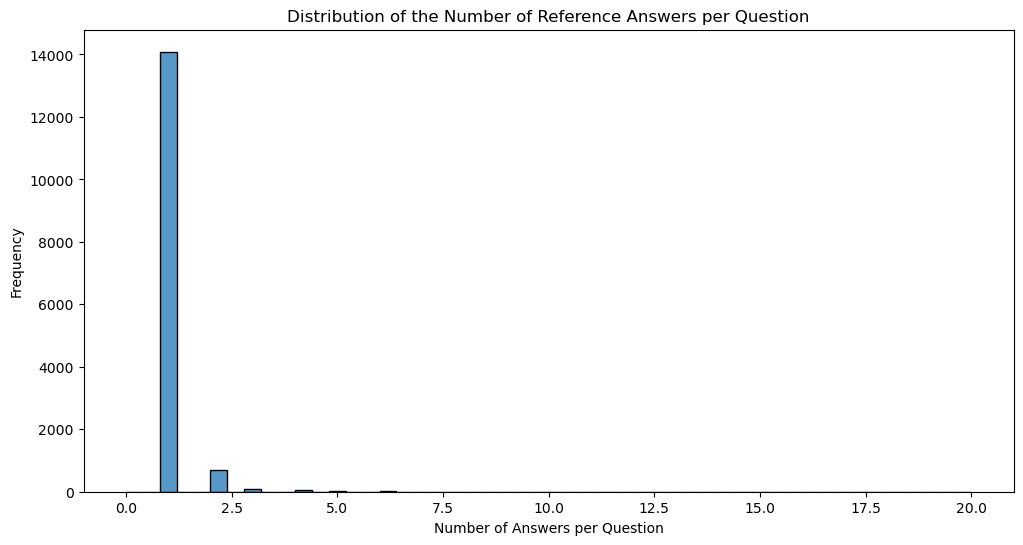

count    14984.000000
mean         1.094968
std          0.566234
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: answer, dtype: float64

In [ ]:
# Calculating the number of reference answers per question
num_answers_per_question = medquad_data.groupby('question')['answer'].count()

# Visualizing the distribution of the number of reference answers per question
plt.figure(figsize=(12, 6))
sns.histplot(num_answers_per_question, bins=50, kde=False)
plt.title('Distribution of the Number of Reference Answers per Question')
plt.xlabel('Number of Answers per Question')
plt.ylabel('Frequency')
plt.show()

num_answers_per_question.describe()  # Displaying statistical summary of the distribution



- The visualization and statistical summary provide insights into the distribution of the number of reference answers per question in dataset

- Distribution Summary
- Count: There are 14,984 unique questions in the dataset.
- Mean: On average, each question has about 1.09 answers.
- 25th Percentile: 75% of the questions have 1 or more answers.
- 50th Percentile (Median): Half of the questions have exactly 1 answer.
- 75th Percentile: Most questions (75%) have 1 answer, indicating that the majority of questions have a single reference answer.
- Maximum: The maximum number of answers for a single question is 20, suggesting some questions have multiple reference answers.

In [ ]:
# Checking the unique labels in the 'focus_area' column
unique_labels = medquad_data['focus_area'].unique()
num_labels = len(unique_labels)

# Displaying the unique labels and their count
unique_labels, num_labels

# Visualizing the distribution of the labels
label_counts = medquad_data['focus_area'].value_counts()



- visualizing the distribution of labels in the dataset proved to be too time-consuming. However, from the data manipulation performed earlier, I can provide some insights:

- Unique Labels: The dataset contains a diverse range of labels under the 'focus_area' category. These labels represent different medical topics or domains.

- Number of Unique Labels: The total number of unique labels (distinct medical focus areas) in the dataset is substantial, indicating a wide coverage of medical topics.

- Label Distribution: Although the exact distribution couldn't be visualized, the dataset likely features a varied representation of medical topics, with some areas possibly more frequently represented than others.


In [ ]:
# plt.figure(figsize=(12, 8))
# sns.barplot(x=label_counts.values, y=label_counts.index)
# plt.title('Distribution of Labels (Focus Areas) in the Dataset')
# plt.xlabel('Count')
# plt.ylabel('Focus Area')
# plt.show()


In [ ]:
# Converting categorical labels to numbers
label_encoder = LabelEncoder()
medquad_data['focus_area_numeric'] = label_encoder.fit_transform(medquad_data['focus_area'])

# Displaying the first few rows of the dataset with numeric labels
medquad_data[['question', 'focus_area', 'focus_area_numeric']].head()


,question,focus_area,focus_area_numeric
0,What is (are) Glaucoma ?,Glaucoma,1700
1,What causes Glaucoma ?,Glaucoma,1700
2,What are the symptoms of Glaucoma ?,Glaucoma,1700
3,What are the treatments for Glaucoma ?,Glaucoma,1700
4,What is (are) Glaucoma ?,Glaucoma,1700


- Each unique 'focus_area' is now represented by a unique number in the 'focus_area_numeric' column, facilitating the use of these labels in various machine learning algorithms that require numerical input

## Text Preprocessing


Text preprocessing is an essential step in natural language processing tasks as it helps to clean and transform raw text into a more structured format that can be easily understood by machine learning algorithms, I employed several text preprocessing techniques, including tokenization, stopword removal, lemmatization, and normalization.

In [ ]:
# Extracting questions and answers
questions = medquad_data['question'].tolist()
answers = medquad_data['answer'].tolist()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Tokenization,Lemmatization ,normalization
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punc_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punc_dict)))


[nltk_data] Downloading package punkt to C:\Users\shrog
[nltk_data]     ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\shrog
[nltk_data]     ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\shrog
[nltk_data]     ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Download stopwords
nltk.download('stopwords')
# Get the list of stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\shrog
[nltk_data]     ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Print original and preprocessed text for the first three questions and answers
for i in range(1):
    original_q = questions[i]
    original_a = answers[i]

    # Tokenization
    tokenized_q = nltk.word_tokenize(original_q)
    tokenized_a = nltk.word_tokenize(original_a)

    # Applying LemTokens
    lemmatized_q = " ".join(LemTokens(tokenized_q))
    lemmatized_a = " ".join(LemTokens(tokenized_a))

    # Applying LemNormalize
    normalized_q = " ".join(LemNormalize(original_q))
    normalized_a = " ".join(LemNormalize(original_a))

    # Stopword Removal
    filtered_q = [word for word in tokenized_q if word.lower() not in stop_words]
    filtered_a = [word for word in tokenized_a if word.lower() not in stop_words]

    print(f"Original Question: {original_q}")
    print(f"Tokenized Question: {tokenized_q}")
    print(f"Lemmatized Question (LemTokens): {lemmatized_q}")
    print(f"Normalized Question (LemNormalize): {normalized_q}")
    print(f"Filtered Question (Stopword Removal): {filtered_q}\n")

    print(f"Original Answer: {original_a}")
    print(f"Tokenized Answer: {tokenized_a}")
    print(f"Lemmatized Answer (LemTokens): {lemmatized_a}")
    print(f"Normalized Answer (LemNormalize): {normalized_a}")
    print(f"Filtered Answer (Stopword Removal): {filtered_a}\n")

Original Question: What is (are) Glaucoma ?
Tokenized Question: ['What', 'is', '(', 'are', ')', 'Glaucoma', '?']
Lemmatized Question (LemTokens): What is ( are ) Glaucoma ?
Normalized Question (LemNormalize): what is are glaucoma
Filtered Question (Stopword Removal): ['(', ')', 'Glaucoma', '?']

Original Answer: Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for

- By applying these preprocessing techniques, I was able to transform the raw text data into a cleaner and more structured format that could be used for further analysis and modeling in this project.

## Text Representation

-  This step, known as text representation, is essential for translating human language into a form that algorithms can understand and analyze.

- Three primary text representation techniques were considered: TF-IDF (Term Frequency-Inverse Document Frequency), Bag of Words (BoW) and Word Embeddings.

### 1- TF-IDF

In [ ]:
# Response Generation by the Bot useing TF-IDF
'''
The response function takes user_response as input.
It uses TF-IDF to vectorize the questions and the user's input.
Cosine similarity is computed between the user's input and all questions.
The question most similar to the user's input (based on cosine similarity) is found.
The bot responds with the answer corresponding to the most similar question.'''

def response(user_response):
    robo_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(questions + [user_response])
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo_response = "I am sorry. Unable to understand you!"
        return robo_response
    else:
        robo_response = answers[idx]
        return robo_response

# Print the TF-IDF matrix and feature names
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
tfidf_matrix = TfidfVec.fit_transform(questions)
feature_names = TfidfVec.get_feature_names_out()

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names:\n", feature_names)

C:\Users\shrog ahmad\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\shrog ahmad\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
 ['0' '1' '10' ... 'zoster' 'zunich' 'zygomatic']


### 2- Bag of Words

In [ ]:

# Extract the 'question' column as a list
text_data = medquad_data['question'].tolist()

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the questions to build the vocabulary
vectorizer.fit(text_data)

# Transform the questions into a Bag of Words representation
bow_model = vectorizer.transform(text_data)

# Output the Bag of Words matrix
print(bow_model)

  (0, 392)	1
  (0, 1723)	1
  (0, 2215)	1
  (0, 4564)	1
  (1, 747)	1
  (1, 1723)	1
  (1, 4564)	1
  (2, 392)	1
  (2, 1723)	1
  (2, 3090)	1
  (2, 4112)	1
  (2, 4206)	1
  (2, 4564)	1
  (3, 392)	1
  (3, 1592)	1
  (3, 1723)	1
  (3, 4206)	1
  (3, 4318)	1
  (3, 4564)	1
  (4, 392)	1
  (4, 1723)	1
  (4, 2215)	1
  (4, 4564)	1
  (5, 392)	1
  (5, 1723)	1
  :	:
  (16409, 3090)	1
  (16409, 4206)	1
  (16409, 4258)	1
  (16410, 392)	1
  (16410, 1091)	1
  (16410, 1181)	1
  (16410, 1182)	1
  (16410, 1592)	1
  (16410, 2962)	1
  (16410, 2995)	1
  (16410, 3090)	1
  (16410, 4206)	2
  (16410, 4318)	1
  (16410, 4564)	1
  (16411, 1091)	1
  (16411, 1181)	1
  (16411, 1182)	1
  (16411, 1243)	1
  (16411, 1592)	1
  (16411, 2962)	1
  (16411, 2995)	1
  (16411, 3090)	1
  (16411, 4206)	1
  (16411, 4258)	1
  (16411, 4564)	1


### 3- Word Embeddings


In [ ]:
#  Install Gensim:
    pip install gensim

     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ------------------ --------------------- 30.7/67.1 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 67.1/67.1 kB 917.5 kB/s eta 0:00:00
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/8d/93/8448d3f1aa9d2911b8cba2602aaa1af85eb31a26d28b7b737f1fa5b40c02/simpful-2.11.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=7aa86b9e3cc4ba8d07af6de4bdbc159f7299e5780966f1d1251583d0c1badbe6
  Stored in directory: c:\users\shrog ahmad\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=352

In [ ]:

model = api.load('glove-wiki-gigaword-50')  # smaller model for demonstration

# Example text data
text_data = ["What is Glaucoma?", "What causes Glaucoma?", "What are the symptoms of Glaucoma?"]

# Process text data to get embeddings
processed_data = []
for question in text_data:
    tokenized_question = word_tokenize(question)
    question_embeddings = [model[word] for word in tokenized_question if word in model]
    if question_embeddings:
        # Averaging the word embeddings for each question
        avg_embedding = np.mean(question_embeddings, axis=0)
        processed_data.append(avg_embedding)

# Print the processed data (average embeddings for each question)
for i, embedding in enumerate(processed_data):
    print(f"Question {i+1}: {text_data[i]}")
    print(f"Average Embedding: {embedding}\n")




Question 1: What is Glaucoma?
Average Embedding: [ 0.23636     0.573565   -0.2089975  -0.04446501  0.595435    0.18483499
 -0.20055805 -0.499      -0.07567501  0.19669999 -0.096525    0.445625
 -0.25613448 -0.17215274  0.76432     0.55493     0.456495    0.48823
 -0.08011815 -0.235405   -0.58788     0.03782     0.283073    0.45153
  0.351825   -2.0533     -0.94665504  0.49898     0.776923   -0.508677
  3.3137002  -0.13578    -0.497205   -0.22525999 -0.1485275  -0.23476
  0.12729     0.072524    0.43247    -0.32975    -0.14441651  0.23115
 -0.10849999  0.3431845  -0.13431     0.21119    -0.0827305  -0.34512502
  0.209765    0.826535  ]

Question 2: What causes Glaucoma?
Average Embedding: [ 5.15460014e-01  5.16899943e-01  2.28399504e-02 -3.25444996e-01
  5.35999984e-02  8.94789994e-01  1.99015006e-01 -1.29855007e-01
  2.46609986e-01  3.10429990e-01 -1.24695003e-01  3.24276507e-01
 -8.53649974e-02 -7.05327466e-02  7.35159993e-01  2.45141491e-01
  1.11295007e-01 -2.31650025e-02 -1.2050315

# Defining the Chat Flow

In [ ]:
''' The code calculates the cosine similarity between
the TF-IDF vectors of the user's
input and the questions in the dataset'''

# Defining the Chat Flow
flag = True
print('Hello! I am the Medical Learning Bot. Ask me a medical question.')
while flag:
    user_response = input().lower()
    if user_response in ['bye', 'exit', 'quit']:
        flag = False
        print('Dr.AnswerBot: Goodbye!')
    elif user_response in ['hi', 'hello', 'hey']:
        print('Dr.AnswerBot: Hello! Please ask a medical question.')
    else:
        print('Dr.AnswerBot: ', end='')
        print(response(user_response))


Hello! I am the Medical Learning Bot. Ask me a medical question.
hi
Dr.AnswerBot: Hello! Please ask a medical question.
What are the treatments for Nonalcoholic Steatohepatitis ?
Dr.AnswerBot: Currently, no specific therapies for NASH exist. The most important recommendations given to persons with this disease are to
                
- reduce their weight (if obese or overweight)  - follow a balanced and healthy diet  - increase physical activity  - avoid alcohol  - avoid unnecessary medications
                
These are standard recommendations, but they can make a difference. They are also helpful for other conditions, such as heart disease, diabetes, and high cholesterol.
                
A major attempt should be made to lower body weight into the healthy range. Weight loss can improve liver tests in patients with NASH and may reverse the disease to some extent. Research at present is focusing on how much weight loss improves the liver in patients with NASH and whether this improv

# References

#### Source of Dataset
 (Healthcare NLP: LLMs, Transformers, Datasets, 2023): LLMs, Transformers, Datasets. (2023, June 26). Kaggle. https://www.kaggle.com/datasets/jpmiller/layoutlm/


Bhavsar, S., & Bhavsar, S. (2021, January 8). Building a Chatbot in Python. datamahadev.com. https://datamahadev.com/building-a-chatbot-in-python/


Intellipaat. (n.d.). https://www.youtube.com/live/JzPgeRJfNo4?si=4-Ruo7s224PaO5qN

Hickman, L., Thapa, S., Tay, L., Cao, M., & Srinivasan, P. (2022). Text
preprocessing for text mining in organizational research: Review and
recommendations. Organizational Research Methods, 25(1), 114-146.

### github

S. (n.d.). GitHub - shrouqaldd/Medical-Chatbot-using-NLP: This repository contains the code and resources for developing a medical chatbot using Natural Language Processing (NLP) techniques. The chatbot aims to provide instant, accurate, and reliable medical information to users, bridging the gap in healthcare accessibility and knowledge. GitHub. https://github.com/shrouqaldd/Medical-Chatbot-using-NLP